In [1]:
# !pip install -e ../.

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from ExoHunter.params import *
from ExoHunter.cleaner import Cleaner
from ExoHunter.trainer import Trainer

/Users/lorcan/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
def get_kaggle_data(data_name='kaggle', test_size=0.2, drive=0):
    train_path = os.path.join('..',DRIVE[drive], data_name, FILEPATHS[data_name][0])
    test_path = os.path.join('..',DRIVE[drive], data_name, FILEPATHS[data_name][1])
    train_data = pd.read_csv(train_path)
    data_test = pd.read_csv(test_path)
    data_train, data_val = train_test_split(train_data, test_size=test_size)
    return data_train, data_val, data_test

In [24]:
def min_window(data):
    temp = data.drop(columns='LABEL').T
    minim = temp[temp>-660].count().min()
    return minim

In [35]:
def get_nasa_data(data_name='nasa', test_size=0.2, drive=0):
    exo_path = os.path.join('..', DRIVE[0], data_name, FILEPATHS[data_name][0])
    non_exo_path = os.path.join('..', DRIVE[0], data_name, FILEPATHS[data_name][1])
    exo_data = pd.read_csv(exo_path)
    non_exo_data = pd.read_csv(non_exo_path)
    exo_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
    non_exo_data.drop(columns=['Unnamed: 0'], inplace=True)
    exo_data = exo_data.T
    non_exo_data = non_exo_data.T
    exo_data[['LABEL']] = 1
    non_exo_data[['LABEL']] = 0
    all_data = pd.concat([exo_data, non_exo_data])
    minim = min_window(all_data)
    print(minim)
    labels = all_data[['LABEL']]
    all_data = all_data.iloc[:, :minim]
    all_data[['LABEL']] = labels
    training, test_data = train_test_split(all_data, test_size=test_size)
    train_data, val_data = train_test_split(training, test_size=test_size)
    return train_data, val_data, test_data

In [46]:
def get_data(data_name='nasa', test_size=0.2, drive=1):
    if data_name == 'kaggle':
        return get_kaggle_data(test_size=test_size, drive=drive)
    if data_name == 'nasa':
        return get_nasa_data(test_size=test_size, drive=drive)
    return None

In [42]:
def get_Xy(data):
        X = data.drop(columns='LABEL')
        y = data['LABEL'].map({1:0, 2:1})
        return X, y

In [47]:
train_data, val_data, test_data = get_data('nasa')

18421


In [48]:
X_train, y_train = get_Xy(train_data)

In [40]:
# minim = temp[temp>-660].count().min()
train_data.shape

(1028, 18422)

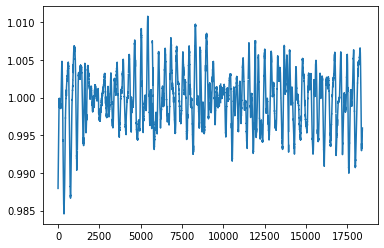

In [49]:
plt.plot(X_train.iloc[700])

In [ ]:
# exo_data.shape, non_exo_data.shape

In [ ]:
# all_data = pd.concat([exo_data, non_exo_data])

In [34]:
temp2 = temp[temp>-660].count()

In [36]:
min_length_frac = temp2[temp2==minim].count()/all_data.shape[0]

In [53]:
majority_frac = temp2[temp2==18422].count()/all_data.shape[0]+temp2[temp2==18421].count()/all_data.shape[0]

In [55]:
snip_len = 18422

In [67]:
cols = [
    'Min snippet length',
    'Fraction of samples of min snippet length',
    'Fraction of samples of min snippet length+1||min snippet length',
    'Fraction of samples of greater length',
    'Chosen snippet length'
]
dats = [
    minim,
    min_length_frac,
    majority_frac,
    1-majority_frac,
    snip_len
]

In [68]:
pd.DataFrame(dats, index=cols)

,0
Min snippet length,18421.000000
Fraction of samples of min snippet length,0.504667
Fraction of samples of min snippet length+1||min snippet length,0.939639
Fraction of samples of greater length,0.060361
Chosen snippet length,18422.000000
